# Requirements

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [6]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [7]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [8]:
# Print the page source code.
print(browser.page_source)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-MK" lang="en-MK" prefix="og: http://ogp.me/ns#" class="js no-touch progressive-image no-reduced-motion no-edge no-ie css-mask enhanced-xp desktop no-tablet windows no-android no-retina no-safari no-old-safari chrome no-firefox no-iphone no-ipad no-old-macos" data-layout-name="evergreen"><head>
	
































<meta charset="utf-8">
<link rel="canonical" href="https://www.apple.com/mk/">


	
	<link rel="alternate" href="https://www.apple.com/" hreflang="en-US"><link rel="alternate" href="https://www.apple.com/ae-ar/" hreflang="ar-AE"><link rel="alternate" href="https://www.apple.com/ae/" hreflang="en-AE"><link rel="alternate" href="https://www.apple.com/am/" hreflang="en-AM"><link rel="alternate" href="https://www.apple.com/at/" hreflang="de-AT"><link rel="alternate" href="https://www.apple.com/au/" hreflang="en-AU"><link rel="alternate" href="https://www.apple.com/az/" hreflang="en-AZ"><link rel="alternate" href=

In [9]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [10]:
# Print the element's innner text.
print(element.text)

iPhone 16 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [15]:
# Write your code here. Add as many code boxes as you need.
url = "https://books.toscrape.com/"
browser.get(url)
titles= []
prices= []
elements = browser.find_elements(By.CSS_SELECTOR, '.product_pod')
for elem in elements:
    title = elem.find_element(By.TAG_NAME, "h3").text
    price = elem.find_element(By.CSS_SELECTOR, ".price_color").text
    titles.append(title)
    prices.append(float(price[1:]))

browser.quit()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = {'Title': titles, 'Price': prices}
df = pd.DataFrame(data)
print(df)


                                    Title  Price
0                      A Light in the ...  51.77
1                      Tipping the Velvet  53.74
2                              Soumission  50.10
3                           Sharp Objects  47.82
4            Sapiens: A Brief History ...  54.23
5                         The Requiem Red  22.65
6            The Dirty Little Secrets ...  33.34
7                 The Coming Woman: A ...  17.93
8                     The Boys in the ...  22.60
9                         The Black Maria  52.15
10  Starving Hearts (Triangular Trade ...  13.99
11                  Shakespeare's Sonnets  20.66
12                            Set Me Free  17.46
13    Scott Pilgrim's Precious Little ...  52.29
14                      Rip it Up and ...  35.02
15                  Our Band Could Be ...  57.25
16                                   Olio  23.88
17        Mesaerion: The Best Science ...  37.59
18           Libertarianism for Beginners  51.33
19                It

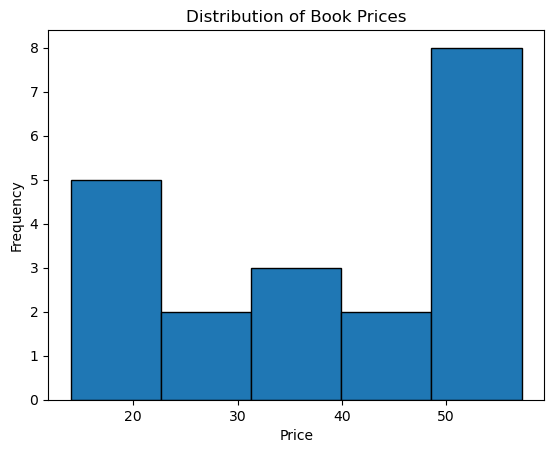

In [18]:
plt.hist(df['Price'], bins=5, edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [23]:
# Write your code here. Add as many code boxes as you need.

In [24]:
url = "https://books.toscrape.com/"
browser.get(url)
titles= []
prices= []
quantities =[]
elements = browser.find_elements(By.CSS_SELECTOR, '.product_pod')
for elem in elements:
    title = elem.find_element(By.TAG_NAME, "h3").text
    price = elem.find_element(By.CSS_SELECTOR, ".price_color").text
    book_link = elem.find_element(By.TAG_NAME, "a").click("href")
    browser.get(book_link)
    
    quantity = driver.find_element(By.CSS_SELECTOR, "p.instock.availability").text.split()[-1]
    titles.append(title)
    prices.append(float(price[1:]))
    quantities.append(int(quantity))

    browser.back()
browser.quit()


MaxRetryError: HTTPConnectionPool(host='localhost', port=52907): Max retries exceeded with url: /session/426aad84cbeb2f97b9a2267a5924ee03/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002724D280770>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
data = {'Title': titles, 'Price': prices, 'Quantity': quantities}
df = pd.DataFrame(data)
print(df)
